In [187]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, roc_auc_score,balanced_accuracy_score,brier_score_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

In [188]:
df = pd.read_csv('../data/df.csv')

In [189]:
targets = df[["Pfirrmann_class_2", "Pfirrmann_class_3", "Pfirrmann_class_4", "Pfirrmann_class_5"]].to_numpy()
probs = df[["Pfirrmann_probability_1_2_sum", "Pfirrmann_probability_3", "Pfirrmann_probability_4", "Pfirrmann_probability_5"]].to_numpy()

In [190]:
def brier_multi(targets, probs):
    return np.mean(np.sum((probs - targets)**2, axis=1))

brier_multi(targets, probs)

0.1976831898341787

In [191]:
df_mc_r = df[['project_ID', 'Level', 'UpperMC_probability', 'UpperMC_correct', 'UpperMarrow', 'gt_mc_r']].copy()
df_mc_r.rename(columns = {'UpperMC_probability':'MC_probability', 'UpperMC_correct': 'MC_correct','UpperMarrow':'MC_prediction', 'gt_mc_r':'gt_mc'}, inplace = True)

df_mc_c = df[['project_ID', 'Level', 'LowerMC_probability','UpperMC_correct', 'LowerMarrow', 'gt_mc_c']].copy()
df_mc_c.rename(columns = {'LowerMC_probability':'MC_probability','UpperMC_correct': 'MC_correct', 'LowerMarrow':'MC_prediction', 'gt_mc_c':'gt_mc'}, inplace = True)

dfs = [df_mc_r, df_mc_c]

df_mc = pd.concat(dfs)




In [192]:
df_mc.dropna(inplace=True)

In [193]:
def a(row):
    val = None
    if row['MC_prediction'] == 1:
        val = row['MC_probability']
    elif row['MC_prediction'] == 0:
        val = 1 - row['MC_probability']
    return val

df_mc['MC_gt_probabilities'] = df_mc.apply(a, axis=1)

In [194]:
targets = df_mc["gt_mc"].astype('int32').to_numpy()
probs = df_mc["MC_gt_probabilities"].astype('int32').to_numpy()

# test = targets - probs

def brier_binary(targets, probs):
    return np.mean((targets - probs) ** 2)

brier_binary(targets, probs)
# np.mean(test ** 2)

0.20656259034403007

In [195]:
from pycm import ConfusionMatrix


In [196]:
df = df_mc
y_true = df['gt_mc'].astype('int32').to_numpy()
y_pred = df['MC_prediction'].astype('int32').to_numpy()
y_probs = df['MC_gt_probabilities'].to_numpy()
cm = ConfusionMatrix(y_true, y_pred)
print(cm)

Predict     0           1           
Actual
0           10553       425         

1           715         2143        





Overall Statistics : 

95% CI                                                            (0.91302,0.92219)
ACC Macro                                                         0.91761
ARI                                                               0.64989
AUNP                                                              0.85556
AUNU                                                              0.85556
Bangdiwala B                                                      0.88491
Bennett S                                                         0.83521
CBA                                                               0.84319
CSI                                                               0.74108
Chi-Squared                                                       7586.28683
Chi-Squared DF                                                    1
Conditional Entropy             

In [197]:
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

In [198]:
print(roc_auc)
print(fpr)

0.9479362695108393
[0.         0.         0.         ... 0.99444343 0.99590089 1.        ]


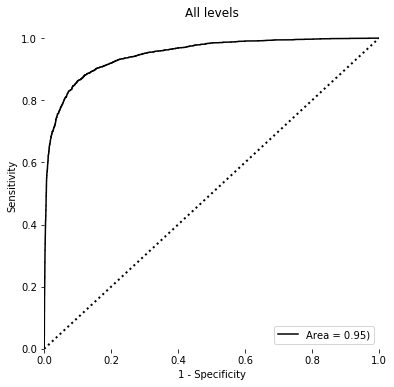

In [199]:
plt.figure(figsize=(6, 6))
plt.plot(
    fpr,
    tpr,
    color="black",
    label="Area = %0.2f)" % roc_auc
)
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="dotted")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.title(f"All levels")
plt.legend(loc="lower right")
plt.box(False)

# plt.savefig(f'../outputs/ROC_MC_all.tiff', dpi=1200)
plt.show()

In [186]:
df_mc.to_csv('../data/ROC_testing_3.csv')

Balanced accuracy: 
0.8555556306327268
Brier score: 
0.20656259034403007


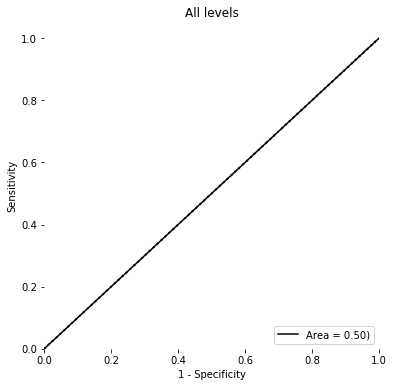

In [68]:
df = df_mc

y_test = df['gt_mc'].astype('int32').to_numpy()
y_prediction = df['MC_prediction'].astype('int32').to_numpy()

# for i in range(n_classes):
print('Balanced accuracy: ')
print(balanced_accuracy_score(y_test, y_prediction))


y_prob = df["MC_gt_probabilities"].astype('int32').to_numpy()
print('Brier score: ')
print(brier_score_loss(y_test, y_prob))

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#### For single ROC plot ####
# for i in range(n_classes):
plt.figure(figsize=(6, 6))
plt.plot(
    fpr,
    tpr,
    color="black",
    label="Area = %0.2f)" % roc_auc
)
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="dotted")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.title(f"All levels")
plt.legend(loc="lower right")
plt.box(False)

# plt.savefig(f'../outputs/ROC_MC_all.tiff', dpi=1200)
plt.show()

In [35]:
from sklearn.metrics import roc_curve, auc, roc_auc_score,balanced_accuracy_score,brier_score_loss
print(brier_score_loss(targets, probs))

0.658717174912291


In [146]:
import numpy as np
from sklearn.metrics import roc_curve
y = np.array([0, 0, 1, 1, 1])
scores = np.array([0.1, 0.4, 0.35, 0.8, 0.9])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)
print(fpr)

print(tpr)

thresholds

[0.  0.  0.  0.5 0.5 1. ]
[0.         0.33333333 0.66666667 0.66666667 1.         1.        ]


array([1.9 , 0.9 , 0.8 , 0.4 , 0.35, 0.1 ])

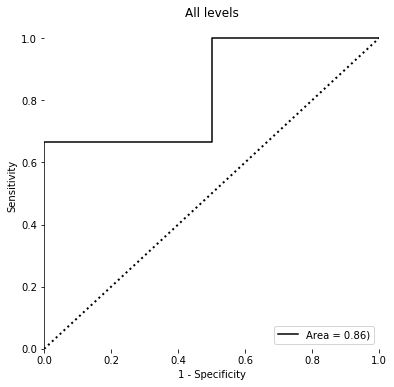

In [147]:
plt.figure(figsize=(6, 6))
plt.plot(
    fpr,
    tpr,
    color="black",
    label="Area = %0.2f)" % roc_auc
)
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="dotted")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.title(f"All levels")
plt.legend(loc="lower right")
plt.box(False)

# plt.savefig(f'../outputs/ROC_MC_all.tiff', dpi=1200)
plt.show()

In [164]:
df = pd.read_csv('../data/ROC_testing.csv')

In [165]:
y_true = df['gt_mc'].astype('int32').to_numpy()
y_trueB = df['MC_correct'].astype('int32').to_numpy()

y_pred = df['MC_prediction'].astype('int32').to_numpy()
y_probs = df['MC_gt_probabilities'].to_numpy()
y_probsB = df['MC_probability'].to_numpy()

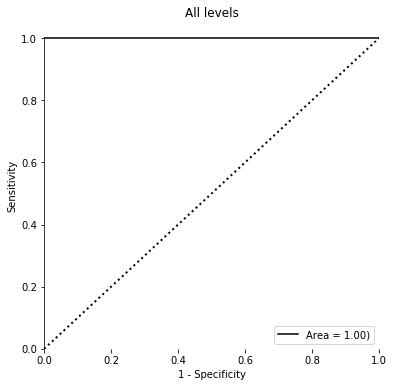

In [168]:
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)



plt.figure(figsize=(6, 6))
plt.plot(
    fpr,
    tpr,
    color="black",
    label="Area = %0.2f)" % roc_auc
)
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="dotted")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.title(f"All levels")
plt.legend(loc="lower right")
plt.box(False)

plt.savefig(f'../outputs/ROC_MC_all.tiff', dpi=1200)
plt.show()